# 1. Choose a binary classification dataset.

In [18]:
# 1. Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [6]:
# 'M' (malignant) → 1, 'B' (benign) → 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [7]:
X = df.drop(columns=['diagnosis'])  # All predictor features
y = df['diagnosis']                 # Target variable

# 2. Train/test split and standardize features.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Fit a Logistic Regression model.

In [10]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

# 4. Evaluate with confusion matrix, precision, recall, ROC-AUC.

In [11]:
y_pred = log_reg.predict(X_test_scaled)            # Predicted classes
y_prob = log_reg.predict_proba(X_test_scaled)[:,1] # Predicted probabilities for ROC

In [13]:
print(y_pred)
print(y_prob)

[0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 1]
[3.64568116e-04 9.99999989e-01 4.25679471e-02 5.76187322e-01
 5.09155489e-01 6.16001620e-04 7.61534086e-01 1.01217174e-03
 5.68725516e-04 1.07675795e-02 9.30905953e-01 7.28319772e-05
 9.99999899e-01 4.39449272e-03 7.75262630e-03 1.70641370e-06
 6.14294329e-02 3.62811536e-04 2.21762013e-01 5.07279789e-05
 1.26622816e-03 4.30342121e-03 9.99999581e-01 9.98321524e-01
 7.57606906e-01 2.05880632e-04 1.68680282e-04 9.69171419e-01
 9.96639529e-01 9.99579644e-01 9.99991854e-01 2.37027672e-03
 9.99964222e-01 9.99954679e-01 2.66371788e-04 1.39030746e-02
 2.02020415e-03 3.20211147e-06 9.90930715e-01 9.31932725e-02
 1.25745605e-04 3.52528144e-04 8.52325081e-01 2.51409506e-03
 1.08172442e-02 9.54067888e-01 7.56926419e-02 9.98508631e-01
 5.69898683e-05 1.11541174e-03 9.99

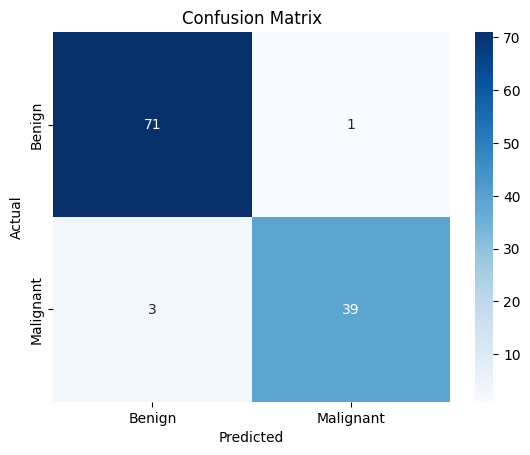

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Classification report: precision, recall, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [20]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.996031746031746


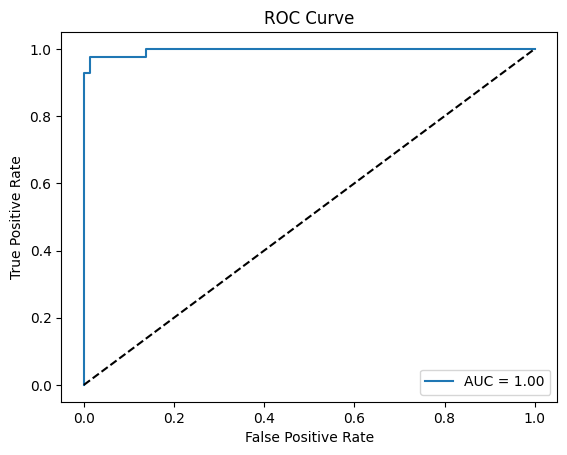

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--') # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 5. Tune threshold

In [22]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, ths = precision_recall_curve(y_test, y_prob)
f1 = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = np.argmax(f1)
best_threshold = ths[best_idx]


In [23]:
y_pred_custom = (y_prob >= best_threshold).astype(int)
cm_custom = confusion_matrix(y_test, y_pred_custom)

In [24]:
print(cm_custom)

[[71  1]
 [ 1 41]]


# 5. Explain sigmoid function.

In the realm of deep learning, the sigmoid function, also known as the logistic function, stands as a fundamental activation function with a distinct S-shaped curve.

Sigmoid Function:

Key Points-

S-shaped curve (Sigmoidal): A characteristic S-shape that maps inputs to outputs.

Output Range (0 to 1): Maps any real-valued input to a value between 0 and 1.

Used as an Activation Function: Historically used in neural networks to introduce non-linearity and enable learning of complex patterns.

Especially Useful for Binary Classification: Output can be interpreted as a probability of belonging to a particular class (e.g., spam or not spam).


**In essence, the sigmoid function was a groundbreaking activation function that allowed neural networks to model non-linear relationships.**